In [96]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

In [97]:
data <- data.table::fread(file = "tidy_data_wide.csv")
sheets <- c("20min STM", "1hr STM", "3hr STM")
experiments <- c("20min STM", "1hr STM", "3hr STM")
genotypes <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
data<-data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")



In [98]:
# panel2_data <- data[experiment != "20min STM" | User == "CH",]
panel2_data <- data

In [99]:
panel2_data_long <- melt(panel2_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [100]:
A <- panel2_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel2_data[experiment=="1hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
C <- panel2_data[experiment=="3hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]

In [101]:
data.table::fwrite(x = A, file="prism/Fig2/Figure_2_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig2/Figure_2_1hr STM.csv", quote=TRUE)
data.table::fwrite(x = C, file="prism/Fig2/Figure_2_3hr STM.csv", quote=TRUE)
x<-Cbind(Ad, Bd, Cd)
colnames(x) <- c("20min STM", "1hr STM", "3hr STM")
data.table::fwrite(x =x, file="prism/Fig2/Figure_2_boxplot.csv")

In [102]:
panel2_data[, .N, by=Genotype]

Genotype,N
<chr>,<int>
MB010B.(II)SPARC-Chrimson ISO,56
MB010B.(II)SPARC-GFP ISO,41
orb2,15
Iso31,114
dnc,3


[1] -1.02  0.70
[1] 0.5


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3

$direction
[1] "horizontal"

$annotation
     group__ y_position annotations stars   N test          PI   PI_median
1: 20min STM        0.5     < 0.001   *** 138  PRE  0.02509035  0.03650000
2: 20min STM        0.5     < 0.001   *** 138 POST -0.22197688 -0.18750000
3:   1hr STM        0.5     < 0.001   ***  22  PRE -0.02015434  0.00000000
4:   1hr STM        0.5     < 0.001   ***  22 POST -0.32580195 -0.27608333
5:   3hr STM        0.5      0.0028   ***  51  PRE  0.01235181  0.00000000
6:   3hr STM        0.5      0.0028   ***  51 POST -0.08941799 -0.07142857
       PI_std  std_error x
1: 0.08318033 0.00708078 1
2: 0.30081807 0.02560733 2
3: 0.08447959 0.01801111 1
4: 0.29923224 0.06379653 2
5: 0.08385194 0.01174162 1
6: 0.25064295 0.03509703 2


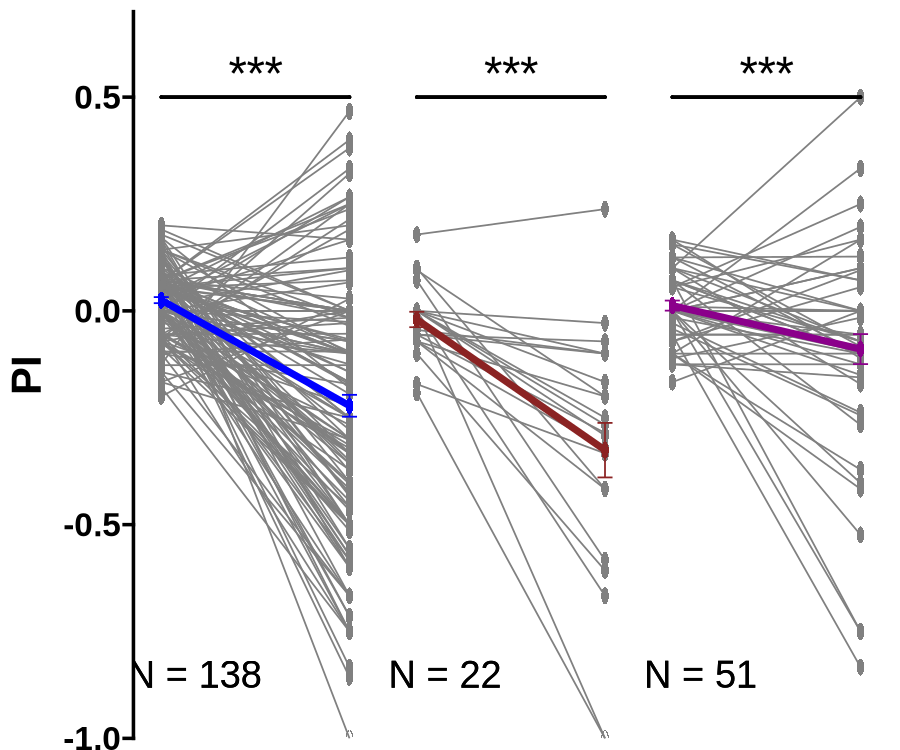

In [103]:
ratio=2.5
size_unit=2.5
panel2A <- learning_plot(
    panel2_data_long[Genotype%in%wts,], "experiment", "horizontal", y_limits=y_limits_panel2,
    colors=colors_panel2[1:length(experiments)], test=paired_t_test,
    map_signif_level=TRUE,
    starsize=10, textsize=8,
    hjust_text=0.25,
    y_annotation=0.5
)
save_learning_plot(plot = panel2A, filename = "prism/Fig2/panel2A.svg", ratio=ratio, size_unit=size_unit)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel2A$n_facets)
panel2A

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


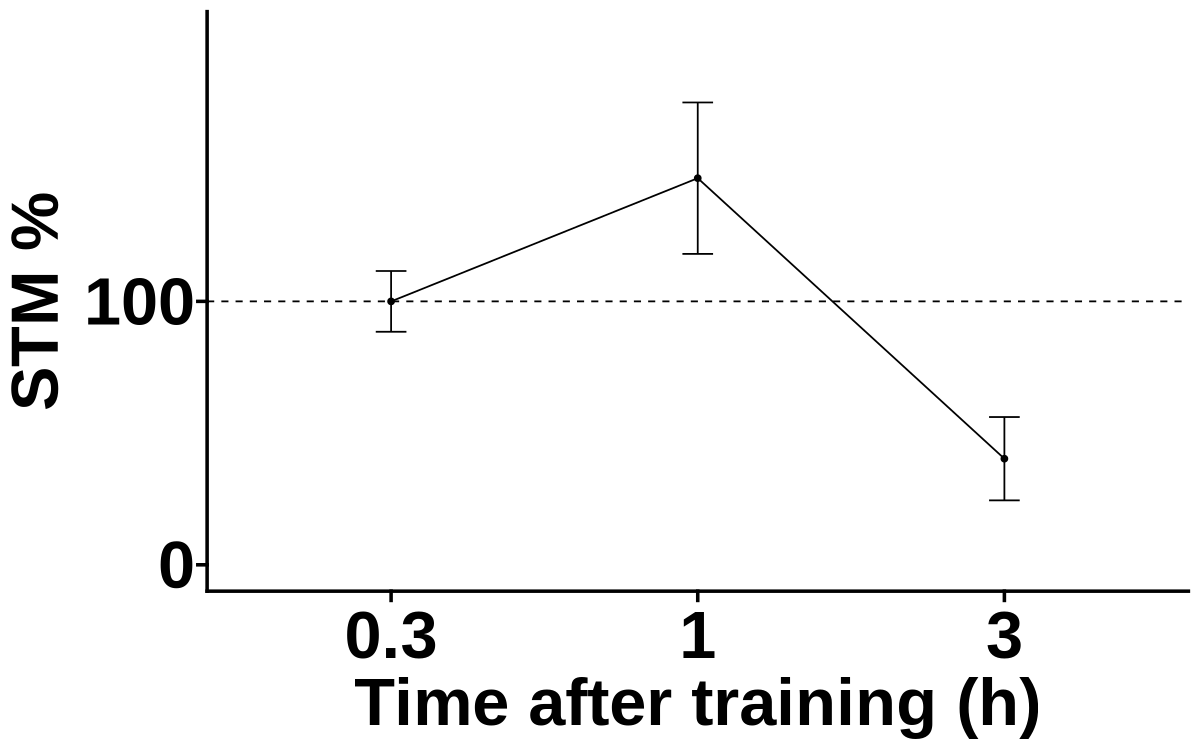

In [104]:
options(repr.plot.width=10)
ref_pi <- panel2A$annotation[test=="POST" & group__ == "20min STM", PI]
ggplot(data=panel2A$annotation[test=="POST", .(group__, norm_PI=PI / ref_pi, std_error)], aes(x=group__, y=norm_PI, group=1)) +
  geom_line() +
  geom_point() +
  geom_errorbar(aes(x=group__, ymin=norm_PI - std_error / ref_pi, ymax=norm_PI + std_error / ref_pi), width=.1) +
  scale_x_discrete(labels=c(0.3, 1, 3), name="Time after training (h)") +
  scale_y_continuous(limits=c(0, 2), breaks=c(0, 1), labels=c(0, 100), name="STM %") + geom_hline(yintercept=1, linetype="dashed")

In [105]:
panel2_data_long[Genotype%in%wts & test == "POST", mean(PI), by=experiment]

experiment,V1
<fct>,<dbl>
20min STM,-0.22197688
3hr STM,-0.08941799
1hr STM,-0.32580195


Warning message in `[.data.table`(data, , `:=`(outlier, FALSE)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

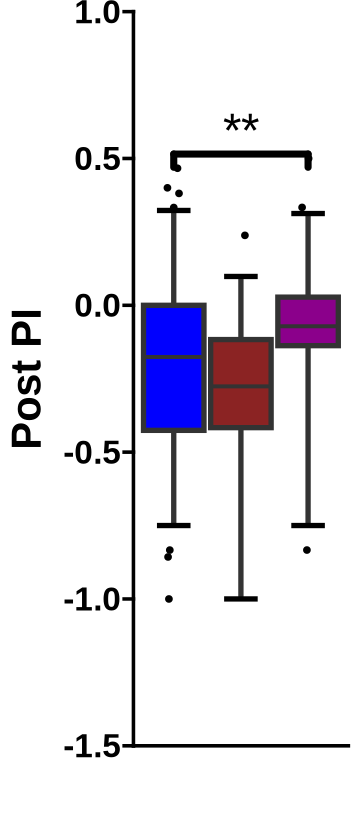

In [109]:
ratio=7
size_unit=1
panel2B <- summary_plot(
    data=panel2_data_long,
    group = "experiment", 
    comparisons = list(
        c("20min STM", "3hr STM")
        # c("1hr STM", "3hr STM")
    ),
    map_signif_level=T,
    annotation_y=c(0.44),
    test=unpaired_t_test,
    colors=colors_panel2[1:length(experiments)],
    x_labels_angle=45,
    y_limits=c(-1.5, 1),
    starsize=10,
    text_y_size=20,
    title_y_size=25,
    percentile=c(0.025, 0.975)
)
panel2B$gg <- panel2B$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel2B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel2B
save_summ_plot(plot=panel2B, filename = "prism/Fig2/panel2B.svg", size_unit=size_unit, ratio=ratio)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.te

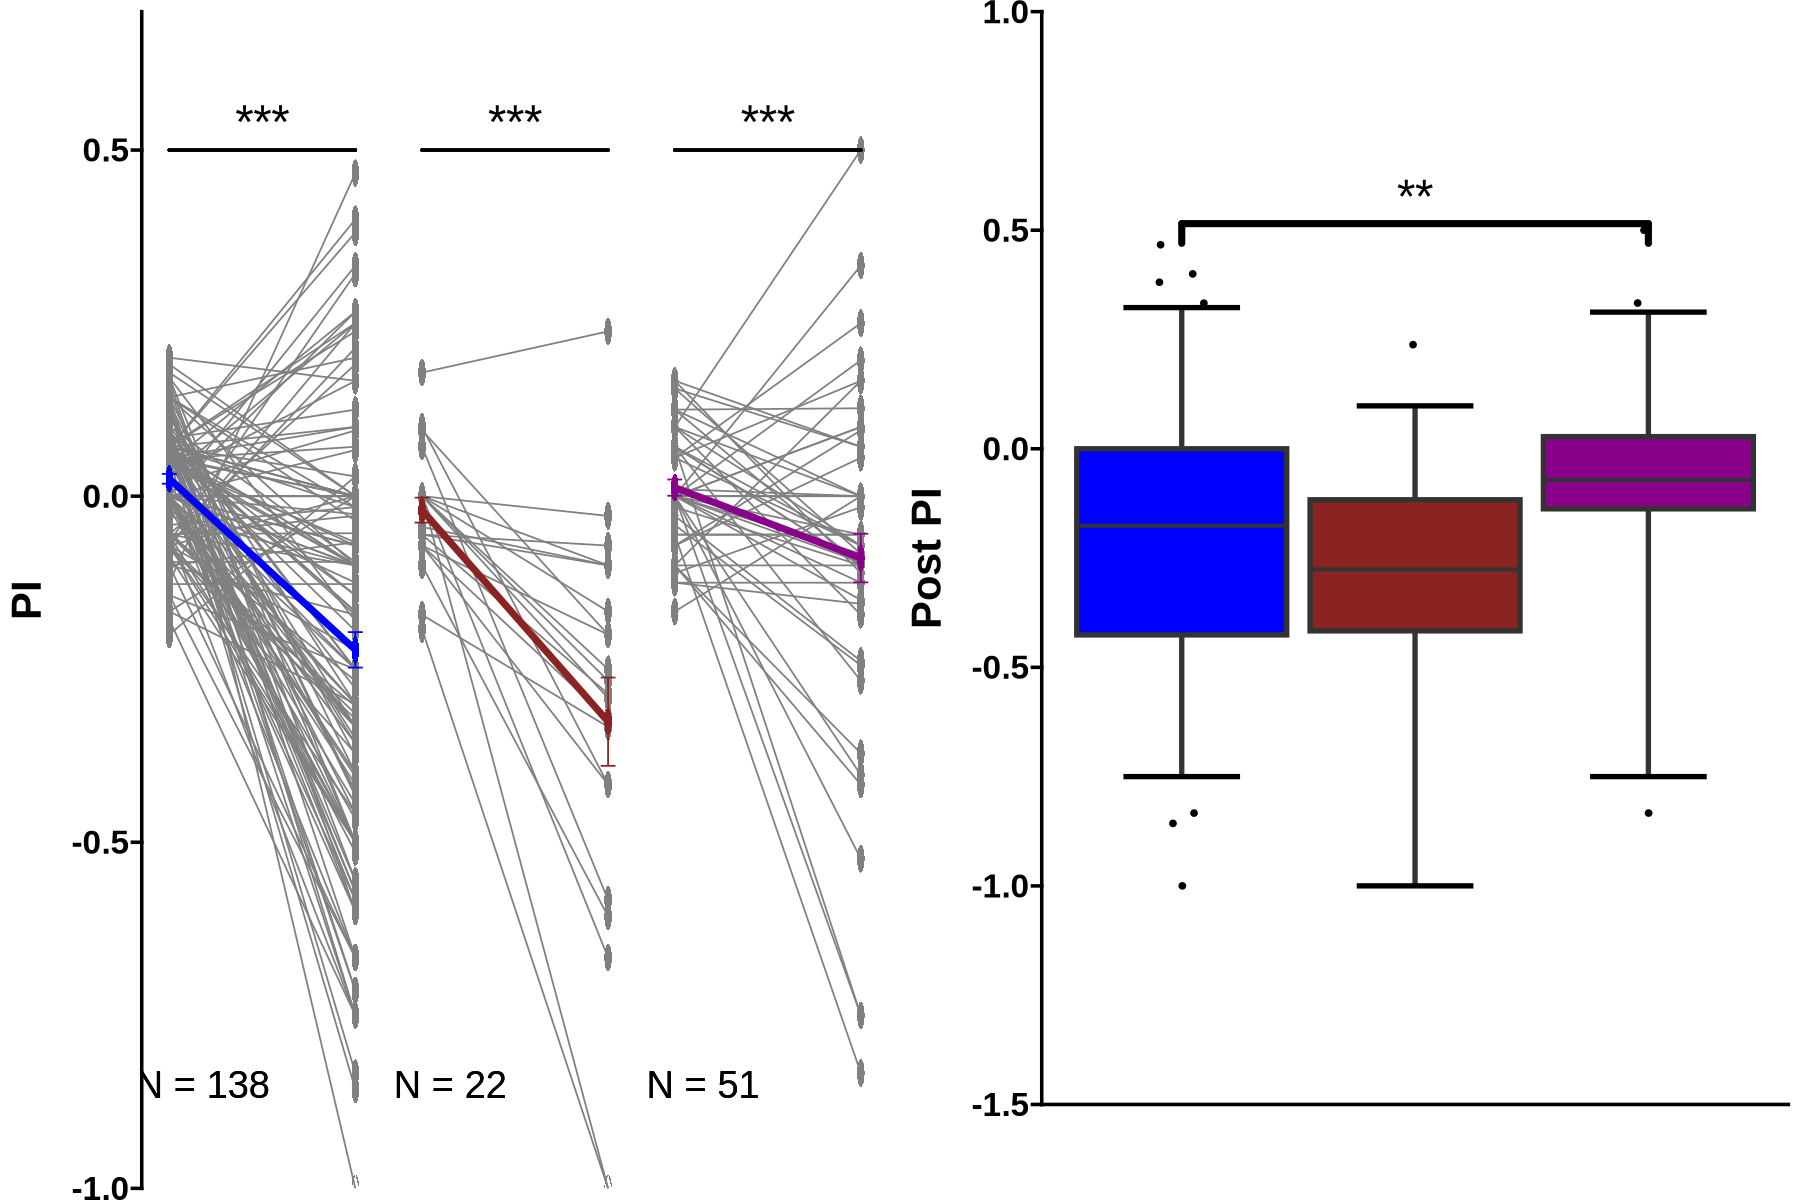

In [111]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel2A$gg, panel2B$gg, ncol=2)
ggsave(plot = gg, filename = "prism/Fig2/Figure_2.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg